## REGRESION LOGISTICA
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



In [ ]:
#Cargar el dataset
data= pd.read_csv('heart_cleveland_upload.csv')
#print(data)

# Renombrar columnas a español
data.columns = ['edad', 'sexo', 'tipo_dolor', 'presion_arterial', 'colesterol', 
                'glucosa_en_ayunas', 'electrocardiograma_en_reposo', 'frecuencia_cardiaca_max', 
                'angina_inducida_por_ejercicio', 'depresion_st_por_ejercicio', 'pendiente_st',
                'num_vasos_coloreados_fluoroscopy', 'thalassemia', 'condicion']

#Explorar la estructura de datos """
print("Primeras filas del conjunto de datos:")
print(data.head())

# Descripción estadística de los datos
print("\nDescripción estadística de las variables numéricas:")
print(data.describe())


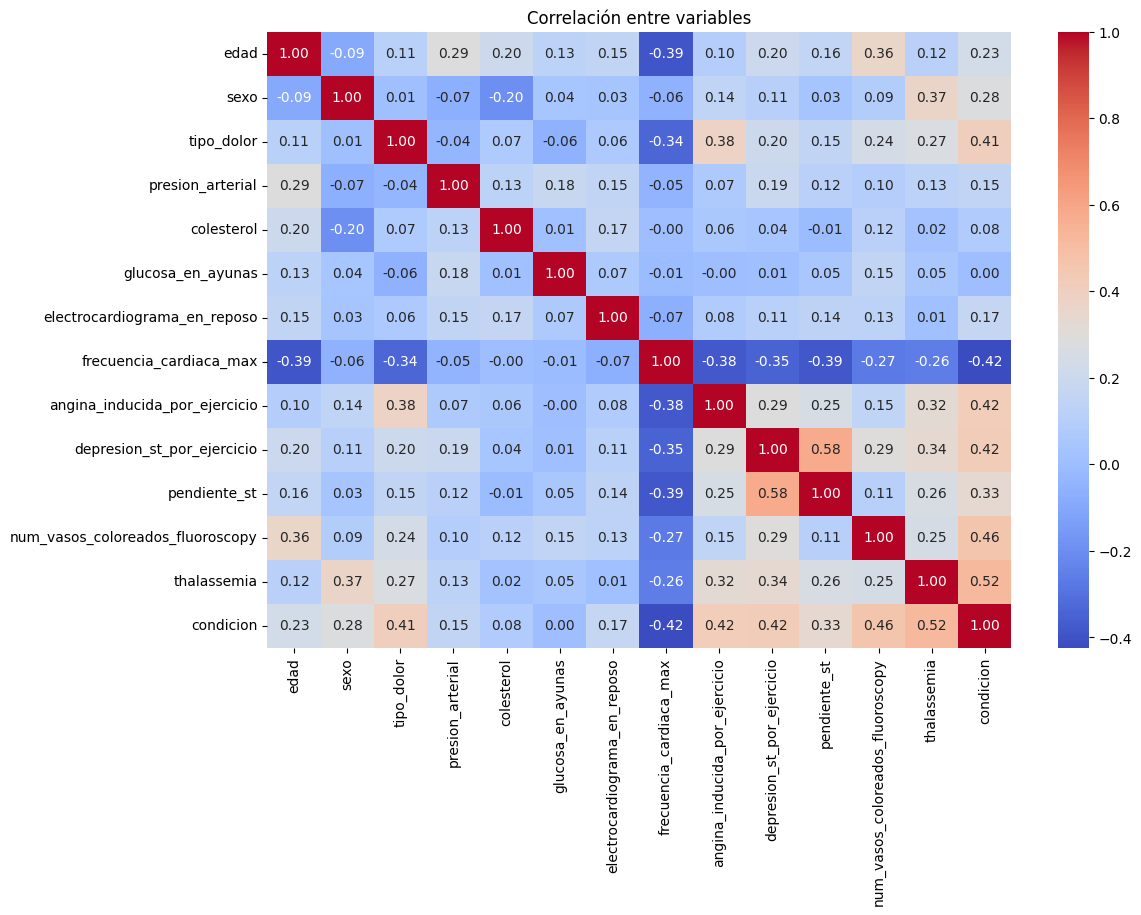

In [3]:
# Paso 4: Visualización de datos
# Gráfico de correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

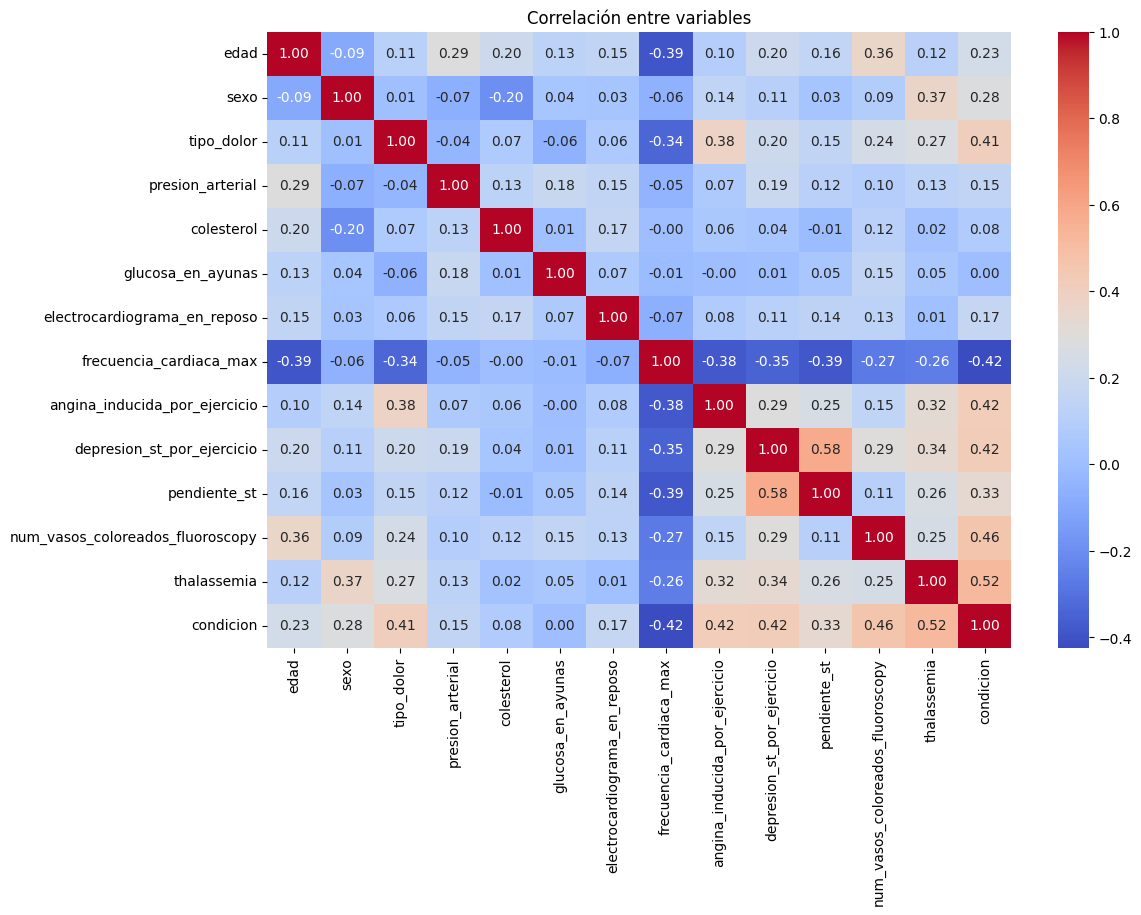

In [4]:
# Paso 5: Visualización de datos
# Gráfico de correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()
#TODO HACER ANALISIS

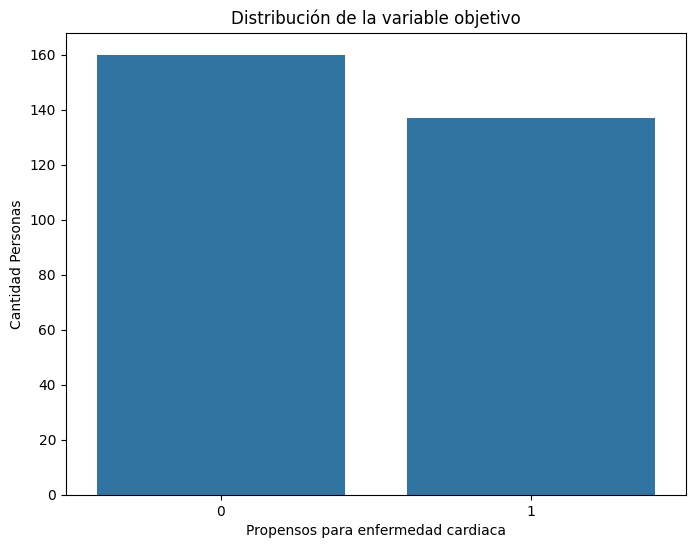

In [5]:
# Gráfico de distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='condicion', data=data)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Propensos para enfermedad cardiaca')
plt.ylabel('Cantidad Personas') 
plt.show()

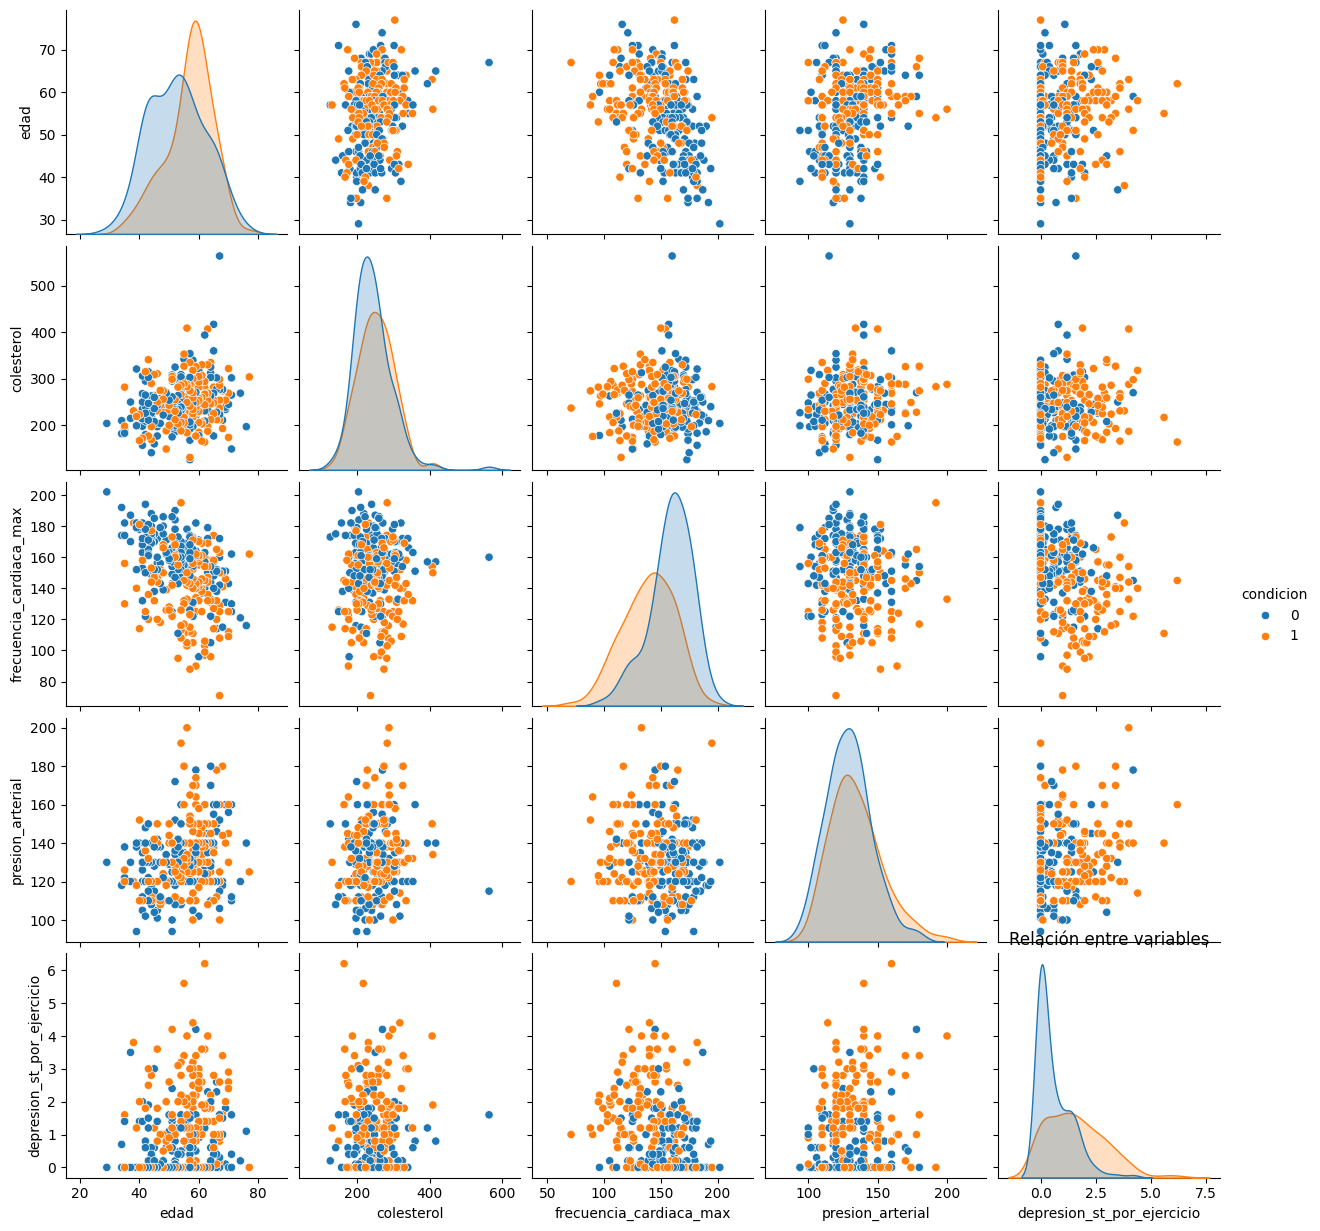

In [6]:
# Gráfico de dispersión entre variables
sns.pairplot(data, vars=['edad', 'colesterol', 'frecuencia_cardiaca_max', 
                        'presion_arterial', 'depresion_st_por_ejercicio'], hue='condicion')
plt.title('Relación entre variables')
plt.show()

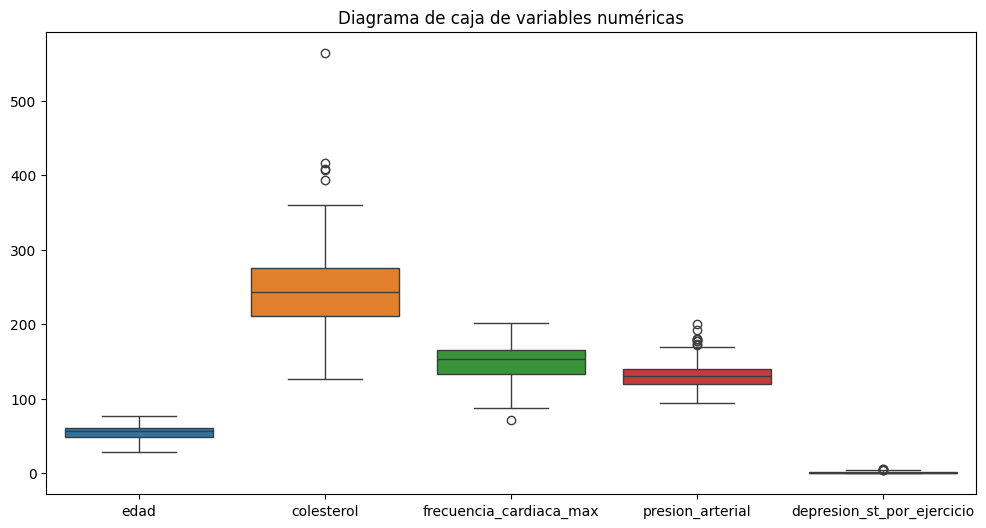

In [7]:
#Paso 6: Identificación de valores atípicos
# Gráfico de caja para variables numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['edad', 'colesterol', 'frecuencia_cardiaca_max', 
                    'presion_arterial', 'depresion_st_por_ejercicio']])
plt.title('Diagrama de caja de variables numéricas')
plt.show()

#TODO Colocar limite


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

Para organizar los datos y eliminar los valores atípicos en el gráfico de caja,  
    primero necesitamos encontrar los valores mínimo y máximo para cada variable. 
    Luego, podemos utilizar estos valores para establecer los límites en el gráfico de caja. 
    Aquí está el código:


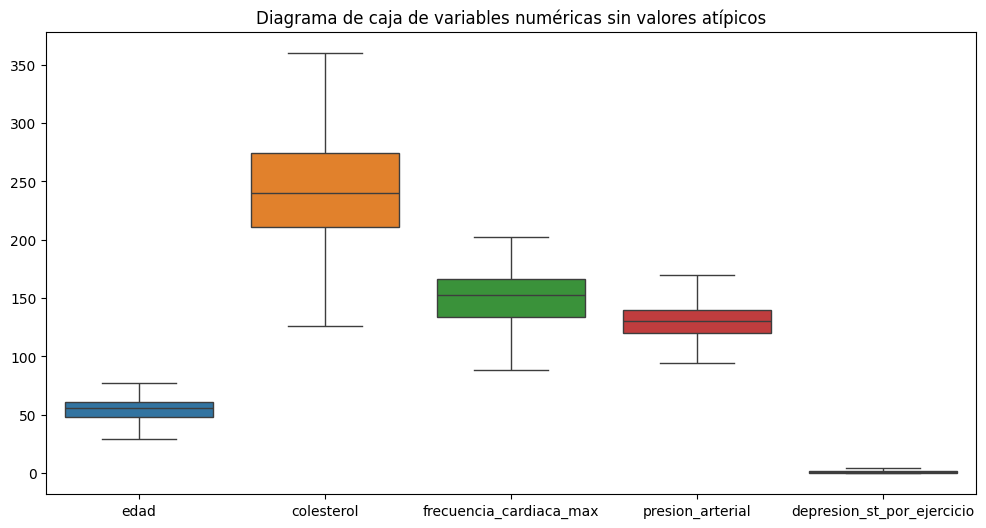

In [8]:
print('''Para organizar los datos y eliminar los valores atípicos en el gráfico de caja,  
    primero necesitamos encontrar los valores mínimo y máximo para cada variable. 
    Luego, podemos utilizar estos valores para establecer los límites en el gráfico de caja. 
    Aquí está el código:''')
# Calcular el rango intercuartílico (IQR) para cada variable
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Establecer los límites para detectar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar valores atípicos
data_filtrado = data[(data >= limite_inferior) & (data <= limite_superior)]

# Gráfico de caja para variables numéricas sin valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrado[['edad', 'colesterol', 'frecuencia_cardiaca_max', 
                                'presion_arterial', 'depresion_st_por_ejercicio']])
plt.title('Diagrama de caja de variables numéricas sin valores atípicos')
plt.show()


In [ ]:
# Paso 7: Análisis de valores faltantes
print("\nValores faltantes en el conjunto de datos:")
print(data.isnull().sum())

In [10]:
# TODO Paso 8: Conclusiones preliminares
print("\nConclusiones preliminares:")
# Puedes agregar tus conclusiones aquí basadas en el análisis exploratorio realizado.


Conclusiones preliminares:


3. Seleccionar las características más relevantes para entrenar emodelo utilizando selección de características.

In [ ]:
# Total de personas con Diabetes
data['condicion'].value_counts()


In [19]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

from sklearn.model_selection import train_test_split


X = data.drop('condicion',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = data['condicion'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [ ]:

print (X_train)

In [ ]:
print (Y_train)

In [22]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [ ]:

print (Y_test)

In [ ]:

print (Prediccion)

In [ ]:

#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

# Desempeño del modelo de regresión

from sklearn.metrics import classification_report


print(classification_report(Y_test,Prediccion))

In [ ]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

#Matrix de Confusión del modelo

from sklearn import metrics
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos
Del desempeño del modelo se puede describir:

Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "diabético" es 0,70, lo que significa que el 70% de los predichos como diabéticos por el modelo eran en realidad diabéticos.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "diabético" es 0,57, lo que indica que el modelo identificó correctamente al 57% de todos los diabéticos.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "diabética" es 0,61, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 109

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 36

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 15

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 31

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,69 lo que significa que el 69 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.